# Modelos Escolhidos

| Model             | Model Size | Context Window (tokens) | Attention | Activation | Layer Norm |
| ----------------- | ---------- | ----------------------- | --------- | ---------- | ---------- |
| Cogito 70B        | 70B        | 128000                  | MHA       | SwiGLU     | RMSNorm    |
| Cogito 8B         | 8B         | 128000                  | MHA       | SwiGLU     | RMSNorm    |
| DeepSeek R1 70B   | 70B        | 128000                  | MLA       | SwiGLU     | RMSNorm    |
| DeepSeek R1 8B    | 8B         | 128000                  | MLA       | SwiGLU     | RMSNorm    |
| Falcon3 10B       | 10B        | 32000                   | GQA       | ReLU       | LayerNorm  |
| Falcon3 7B        | 7B         | 32000                   | GQA       | ReLU       | LayerNorm  |
| Foundation-Sec 8B | 8B         | 128000                  | MHA       | SwiGLU     | RMSNorm    |
| Gemma 3 27B       | 27B        | 8192                    | GQA       | GeGLU      | RMSNorm    |
| Gemma 3 9B        | 9B         | 8192                    | GQA       | GeGLU      | RMSNorm    |
| GPT-OSS 20B       | 20B        | 131072                  | MoE       | SwiGLU     | RMSNorm    |
| Granite3.2 8B     | 8B         | 131072                  | MHA       | SwiGLU     | RMSNorm    |
| Llama 3.1 70B     | 70B        | 128000                  | GQA       | SwiGLU     | RMSNorm    |
| Llama 3.1 8B      | 8B         | 128000                  | MHA       | SwiGLU     | RMSNorm    |
| Llama 3.3 70B     | 70B        | 131072                  | GQA       | SwiGLU     | RMSNorm    |
| Mistral 7B        | 7B         | 32768                   | GQA, SWA  | SwiGLU     | RMSNorm    |
| Mistral Small 24B | 24B        | 32768                   | GQA       | SwiGLU     | RMSNorm    |
| Phi-3 Medium 14B  | 14B        | 128000                  | MHA       | GeGLU      | RMSNorm    |
| Phi-3 Small 7B    | 7B         | 8192                    | GQA       | GeGLU      | RMSNorm    |
| Phi-4 14B         | 14B        | 16000                   | MHA       | GeGLU      | RMSNorm    |
| Qwen2.5 32B       | 32B        | 131072                  | GQA       | SwiGLU     | RMSNorm    |
| Qwen2.5 7B        | 7B         | 131072                  | GQA       | SwiGLU     | RMSNorm    |
| Qwen3 32B         | 32B        | 131072                  | GQA       | SwiGLU     | RMSNorm    |
| Qwen3 8B          | 8B         | 262144                  | GQA       | SwiGLU     | RMSNorm    |
| SmolLM2 1.7B      | 1.7B       | 8192                    | MHA       | SwiGLU     | RMSNorm    |
| TinyLlama 1.1B    | 1.1B       | 2048                    | GQA       | SwiGLU     | RMSNorm    |


# Análise experimento  Final parte 1

In [47]:
# Carregar todos os arquivos zeroshot da raiz
from sklearn.metrics import confusion_matrix, precision_score, recall_score
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re

# Carregar arquivo de categorias reais
df_real = pd.read_excel("data/24_incidentes.xlsx")

# Buscar todos os arquivos zeroshot
zeroshot_files = sorted(glob.glob("experimentos/final/resultados_ollama_*.xlsx"))

print(f"Total de arquivos: {len(zeroshot_files)}")
print(f"Categorias reais disponíveis: {len(df_real)} incidentes")


arquivos_dict = {
    "nome_arquivo": [],
    "colunas": [],
    "modelo": [],
    "parametros": [],
    "Tecnica": []
}

for i in range(len(zeroshot_files)):
    
    model_tecnica = zeroshot_files[i].split('/')[-1].replace('.xlsx','').replace('resultados_ollama_','')

    match_modelo = re.search(r'[\w]+_[\d]+b', model_tecnica)
    match_parametro = re.search(r'[\d]+b', model_tecnica)
    match_tecnica = re.search(r'(?<=_)(hypothesis_testing|progressive_hint|progressive_rectification|self_hint|zeroshot)$', model_tecnica)

    # Leitura robusta do Excel
    try:
        colunas = list(pd.read_excel(zeroshot_files[i], engine='openpyxl').columns)
    except:
        try:
            colunas = list(pd.read_excel(zeroshot_files[i], engine='xlrd').columns)
        except:
            colunas = []  # Lista vazia em caso de erro
    
    arquivos_dict["nome_arquivo"].append(zeroshot_files[i])
    arquivos_dict["colunas"].append(colunas)
    arquivos_dict["modelo"].append(match_modelo.group() if match_modelo else 'não encontrado')
    arquivos_dict["parametros"].append(match_parametro.group() if match_parametro else 'não encontrado')
    arquivos_dict["Tecnica"].append(match_tecnica.group() if match_tecnica else 'não encontrado')

df3 = pd.DataFrame(arquivos_dict)
df_agg = df3.groupby(['modelo','Tecnica']).size().reset_index(name='contagem')
df_agg.pivot(index='modelo', columns='Tecnica', values='contagem').reset_index()

Total de arquivos: 130
Categorias reais disponíveis: 24 incidentes


Tecnica,modelo,hypothesis_testing,progressive_hint,progressive_rectification,self_hint,zeroshot
0,cogito_70b,1,1,1,1,1
1,cogito_8b,1,1,1,1,1
2,deepseek_r1_70b,1,1,1,1,1
3,deepseek_r1_8b,1,1,1,1,1
4,falcon3_10b,1,1,1,1,1
5,falcon3_7b,1,1,1,1,1
6,foundation_sec_8b,1,1,1,1,1
7,gemma2_27b,1,1,1,1,1
8,gemma2_9b,1,1,1,1,1
9,gemma3_12b,1,1,1,1,1


In [48]:
len(df3["modelo"].unique())

26

In [49]:
df3["modelo"].unique()

array(['cogito_70b', 'cogito_8b', 'deepseek_r1_70b', 'deepseek_r1_8b',
       'falcon3_10b', 'falcon3_7b', 'foundation_sec_8b', 'gemma2_27b',
       'gemma2_9b', 'gemma3_12b', 'gemma3_27b', 'gpt_oss_20b',
       'granite3_2_8b', 'llama3_1_8b', 'llama3_3_70b', 'mistral_7b',
       'mistral_small_24b', 'phi3_medium_14b', 'phi3_small_7b',
       'phi4_14b', 'qwen2_5_32b', 'qwen2_5_7b', 'qwen3_32b', 'qwen3_8b',
       'smollm2_1_7b', 'tinyllama_1_1b'], dtype=object)

In [50]:
df_final = pd.DataFrame()
for x in zeroshot_files:
    try:
        df_aux = pd.read_excel(x)
    except:
        print(x)
        continue
    model_tecnica = x.split("/")[-1].replace("resultados_ollama_","").replace(".xlsx","")
    match_modelo = re.search(r'[\w]+_[\d]+b', model_tecnica).group()
    match_parametro = re.search(r'[\d]+b', model_tecnica).group()
    match_tecnica = re.search(r'(?<=_)(hypothesis_testing|progressive_hint|progressive_rectification|self_hint|zeroshot)$', model_tecnica).group()
    
    df_aux['modelo'] = match_modelo
    df_aux['parametro'] = match_parametro
    df_aux['tecnica'] = match_tecnica
    
    if "Category" in list(df_aux.columns):
        df_aux = df_aux.rename(columns={"Category":"categoria","Explanation":"explicacao"})

    df_final = pd.concat([df_final, df_aux])
    
colunas_final = ["id","categoria","explicacao","modelo","parametro","tecnica"]
df_final = df_final[colunas_final]
df_final.rename(columns={"categoria":"categoria_predita","explicacao":"explicacao_predita"}, inplace=True)
df_final = df_final.merge(df_real[['id', 'target','categoria']], on='id', how='left')
df_final['acertou'] = np.where(df_final['categoria_predita'].astype(str).str.lower() == df_final['categoria'].astype(str).str.lower(), 1, 0)
df_final['acertou'] = df_final['acertou'].astype(int)
df_final = df_final[(df_final['modelo']!='smollm2_1_7b') & (df_final['modelo']!='tinyllama_1_1b')]
df_final =  df_final[df_final['modelo']!='phi3_medium_14b']

map_tecnicas = {
    "hypothesis_testing": "HTP",
    "progressive_hint": "PHP",
    "progressive_rectification": "PRP",
    "self_hint": "SHP",
    "zeroshot": "ZSL"
}

# Substitui os nomes na coluna 'tecnica'
df_final["tecnica"] = df_final["tecnica"].map(map_tecnicas)

#df_final =  df_final[df_final['tecnica']!='hypothesis_testing']
df_final.head()

experimentos/final/resultados_ollama_phi3_small_7b_hypothesis_testing.xlsx
experimentos/final/resultados_ollama_phi3_small_7b_progressive_hint.xlsx
experimentos/final/resultados_ollama_phi3_small_7b_progressive_rectification.xlsx
experimentos/final/resultados_ollama_phi3_small_7b_self_hint.xlsx
experimentos/final/resultados_ollama_phi3_small_7b_zeroshot.xlsx


,id,categoria_predita,explicacao_predita,modelo,parametro,tecnica,target,categoria,acertou
0,RNP2022-125941,CAT1,This incident clearly falls under CAT1 (Accoun...,cogito_70b,70b,HTP,[DATE_TIME_a989e9db40] 14:47 CERT.br: \nData d...,CAT12,0
1,RNP2022-026802,CAT1,This incident clearly shows characteristics of...,cogito_70b,70b,HTP,[DATE_TIME_c056487b2c] 12:51 CERT.br: \nData d...,CAT12,0
2,RNP2022-042745,CAT12,This incident is classified as CAT12 (Intrusio...,cogito_70b,70b,HTP,[DATE_TIME_03857e5518] 08:03 CERT.br: \nData d...,CAT12,1
3,RNP2022-026209,CAT1,This incident is a clear case of Account Compr...,cogito_70b,70b,HTP,[DATE_TIME_2ac98305e7] 08:39 CERT.br: \nData d...,CAT12,0
4,RNP2023-049266,CAT2,The incident clearly belongs to CAT2 (Malware)...,cogito_70b,70b,HTP,[DATE_TIME_360012cb84] 07:34 CERT.br: \nData d...,CAT2,1


In [51]:
model_name_map = {
    "cogito_70b": "Cogito 70B",
    "cogito_8b": "Cogito 8B",
    "deepseek_r1_70b": "DeepSeek R1 70B",
    "deepseek_r1_8b": "DeepSeek R1 8B",
    "falcon3_10b": "Falcon3 10B",
    "falcon3_7b": "Falcon3 7B",
    "foundation_sec_8b": "Foundation-Sec 8B",
    "gemma3_27b": "Gemma 3 27B",
    "gemma3_12b": "Gemma 3 12B",
    "gemma2_9b": "Gemma 2 9B",
    "gemma2_27b": "Gemma 2 27B",
    "gpt_oss_20b": "GPT-OSS 20B",
    "granite3_2_8b": "Granite3.2 8B",
    "llama3_1_70b": "Llama 3.1 70B",
    "llama3_1_8b": "Llama 3.1 8B",
    "llama3_3_70b": "Llama 3.3 70B",
    "mistral_7b": "Mistral 7B",
    "mistral_small_24b": "Mistral Small 24B",
    "phi4_14b": "Phi-4 14B",
    "qwen2_5_32b": "Qwen2.5 32B",
    "qwen2_5_7b": "Qwen2.5 7B",
    "qwen3_32b": "Qwen3 32B",
    "qwen3_8b": "Qwen3 8B",
}


grupo1 = [
    'cogito_70b','deepseek_r1_70b','falcon3_10b','gemma2_27b','gemma3_27b','gpt_oss_20b',
    'llama3_3_70b','llama3_1_70b','mistral_small_24b','phi4_14b','qwen2_5_32b','qwen3_32b'
]

grupo2 = [
    'qwen3_8b','qwen2_5_7b','cogito_8b','deepseek_r1_8b','falcon3_7b','gemma2_9b',
    'gemma3_12b','granite3_2_8b','llama3_1_8b','mistral_7b','foundation_sec_8b'
]


df_final["grupo_model"] = df_final["modelo"].apply(
    lambda m: "grupo 1" if m in grupo1 else ("grupo 2" if m in grupo2 else "outro")
)


df_final["full_name_model"] = df_final["modelo"].map(model_name_map)

df_final[["modelo", "grupo_model", "full_name_model"]].head()

,modelo,grupo_model,full_name_model
0,cogito_70b,grupo 1,Cogito 70B
1,cogito_70b,grupo 1,Cogito 70B
2,cogito_70b,grupo 1,Cogito 70B
3,cogito_70b,grupo 1,Cogito 70B
4,cogito_70b,grupo 1,Cogito 70B


In [52]:
df_agg = df_final.groupby(['modelo','tecnica']).size().reset_index(name='contagem')
df_agg.pivot(index='modelo', columns='tecnica', values='contagem').reset_index()

tecnica,modelo,HTP,PHP,PRP,SHP,ZSL
0,cogito_70b,24,24,24,24,24
1,cogito_8b,24,24,24,24,24
2,deepseek_r1_70b,24,24,24,24,24
3,deepseek_r1_8b,24,24,24,24,24
4,falcon3_10b,24,24,24,24,24
5,falcon3_7b,24,24,24,24,24
6,foundation_sec_8b,24,24,24,24,24
7,gemma2_27b,24,24,24,24,24
8,gemma2_9b,24,24,24,24,24
9,gemma3_12b,24,24,24,24,24


In [53]:


# ----- Função para calcular FPR -----
def false_positive_rate(y_true, y_pred, labels):
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    FP = cm.sum(axis=0) - cm.diagonal()
    TN = cm.sum() - (cm.sum(axis=1) + cm.sum(axis=0) - cm.diagonal())
    FPR = FP / (FP + TN)
    return FPR.mean()   # média por classe

# ----- Calcular as métricas agrupadas -----
resultados = []

labels = sorted(df_final["categoria"].unique())

for (grupo, tecnica), df_sub in df_final.groupby(["grupo_model", "tecnica"]):

    y_true = df_sub["categoria"]
    y_pred = df_sub["categoria_predita"]

    recall = recall_score(y_true, y_pred, average='macro')
    precisao = precision_score(y_true, y_pred, average='macro')
    fpr = false_positive_rate(y_true, y_pred, labels)

    resultados.append({
        "grupo_model": grupo,
        "tecnica": tecnica,
        "recall": recall,
        "precisao": precisao,
        "taxa_falso_positivo": fpr
    })

df_metricas_2 = pd.DataFrame(resultados)
df_metricas_2

/home/magalu/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/magalu/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/magalu/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/magalu/.local/lib/python3.10/site-packag

,grupo_model,tecnica,recall,precisao,taxa_falso_positivo
0,grupo 1,HTP,0.176136,0.283323,0.091853
1,grupo 1,PHP,0.463068,0.557975,0.063053
2,grupo 1,PRP,0.359091,0.436192,0.064988
3,grupo 1,SHP,0.396465,0.489120,0.064843
4,grupo 1,ZSL,0.426136,0.522801,0.067682
5,grupo 2,HTP,0.087413,0.213881,0.116663
6,grupo 2,PHP,0.265152,0.370570,0.067532
7,grupo 2,PRP,0.242424,0.370405,0.068305
8,grupo 2,SHP,0.244755,0.347072,0.066530
9,grupo 2,ZSL,0.229021,0.306089,0.075664


In [54]:
df_metricas_2[df_metricas_2['tecnica']=='PHP'].sort_values(by='precisao', ascending=False)

,grupo_model,tecnica,recall,precisao,taxa_falso_positivo
1,grupo 1,PHP,0.463068,0.557975,0.063053
6,grupo 2,PHP,0.265152,0.370570,0.067532


In [55]:
df_metricas_2[df_metricas_2['tecnica']=='ZSL'].sort_values(by='recall', ascending=False)

,grupo_model,tecnica,recall,precisao,taxa_falso_positivo
4,grupo 1,ZSL,0.426136,0.522801,0.067682
9,grupo 2,ZSL,0.229021,0.306089,0.075664


In [56]:
df_metricas_2[df_metricas_2['tecnica']=='SHP'].sort_values(by='recall', ascending=False)

,grupo_model,tecnica,recall,precisao,taxa_falso_positivo
3,grupo 1,SHP,0.396465,0.489120,0.064843
8,grupo 2,SHP,0.244755,0.347072,0.066530


In [57]:
df_metricas_2[df_metricas_2['tecnica']=='HTP'].sort_values(by='recall', ascending=False)

,grupo_model,tecnica,recall,precisao,taxa_falso_positivo
0,grupo 1,HTP,0.176136,0.283323,0.091853
5,grupo 2,HTP,0.087413,0.213881,0.116663


In [58]:
df_metricas_2[df_metricas_2['tecnica']=='PRP'].sort_values(by='recall', ascending=False)

,grupo_model,tecnica,recall,precisao,taxa_falso_positivo
2,grupo 1,PRP,0.359091,0.436192,0.064988
7,grupo 2,PRP,0.242424,0.370405,0.068305


In [59]:
len(df_final['full_name_model'].unique())

22

In [60]:
df_final['grupo_model'].value_counts()

grupo_model
grupo 1    1320
grupo 2    1320
Name: count, dtype: int64

In [61]:
df_final['acertou'].unique()

array([0, 1])

In [62]:
df_final['parametro'].unique()

array(['70b', '8b', '10b', '7b', '27b', '9b', '12b', '20b', '24b', '14b',
       '32b'], dtype=object)

In [63]:
df_final['categoria'].unique()

array(['CAT12', 'CAT2', 'CAT3', 'CAT5', 'CAT7', 'CAT9'], dtype=object)

In [64]:
df_final[df_final['id'] == 'RNP2021-057597']['target'].values[0]

'[DATE_TIME_8adbd1ab5c] 14:11 CERT.br: \nData de envio: Aug 23, 2021 2:07 PM\nPara: [EMAIL_ADDRESS_f6f7086365], [EMAIL_ADDRESS_d5e24eeec6]\nCC: [EMAIL_ADDRESS_83824c64b2]\nAssunto: Desfiguracao de website ([URL_07659cba1e])\n\nSenhores,\n\nChegou ao nosso conhecimento que o website abaixo teve o seu conteudo\nalterado. Ressaltamos que no momento o conteudo alterado continua\nacessivel.\n\nURL: [URL_06a725cac9]\n\n--begin online content (Mon Aug 23 17:07:17 GMT 2021) --\n   IFRAME: [URL_9a675cecea]\n\nHacked by theMx0nday\n\n[skull-dancing.gif]\n\nvcs foram ownados suas vadias 3:)\n   somos: son1x777, bky_992 & xtdins1x\n----end online content--\n\nSolicitamos que o incidente seja investigado e que as acoes cabiveis\nsejam tomadas.\n\nAtenciosamente,\n-- \nCERT.br/NIC.br\n<[EMAIL_ADDRESS_83824c64b2]>\n[URL_ef2283438e]'

In [65]:
df_final[['tecnica','categoria','categoria_predita','acertou']]

,tecnica,categoria,categoria_predita,acertou
0,HTP,CAT12,CAT1,0
1,HTP,CAT12,CAT1,0
2,HTP,CAT12,CAT12,1
3,HTP,CAT12,CAT1,0
4,HTP,CAT2,CAT2,1
...,...,...,...,...
2755,ZSL,CAT7,CAT9,0
2756,ZSL,CAT9,CAT9,1
2757,ZSL,CAT9,CAT9,1
2758,ZSL,CAT9,CAT9,1


In [66]:
df_final[df_final['categoria_predita']!=df_final['categoria']]['categoria'].count()

1330

In [67]:
df_final.shape

(2640, 11)

In [68]:
(df_final[df_final['categoria_predita']==df_final['categoria']]['categoria'].count()/df_final.shape[0])*100

49.621212121212125

/tmp/ipykernel_640825/1780546937.py:43: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
/tmp/ipykernel_640825/1780546937.py:60: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


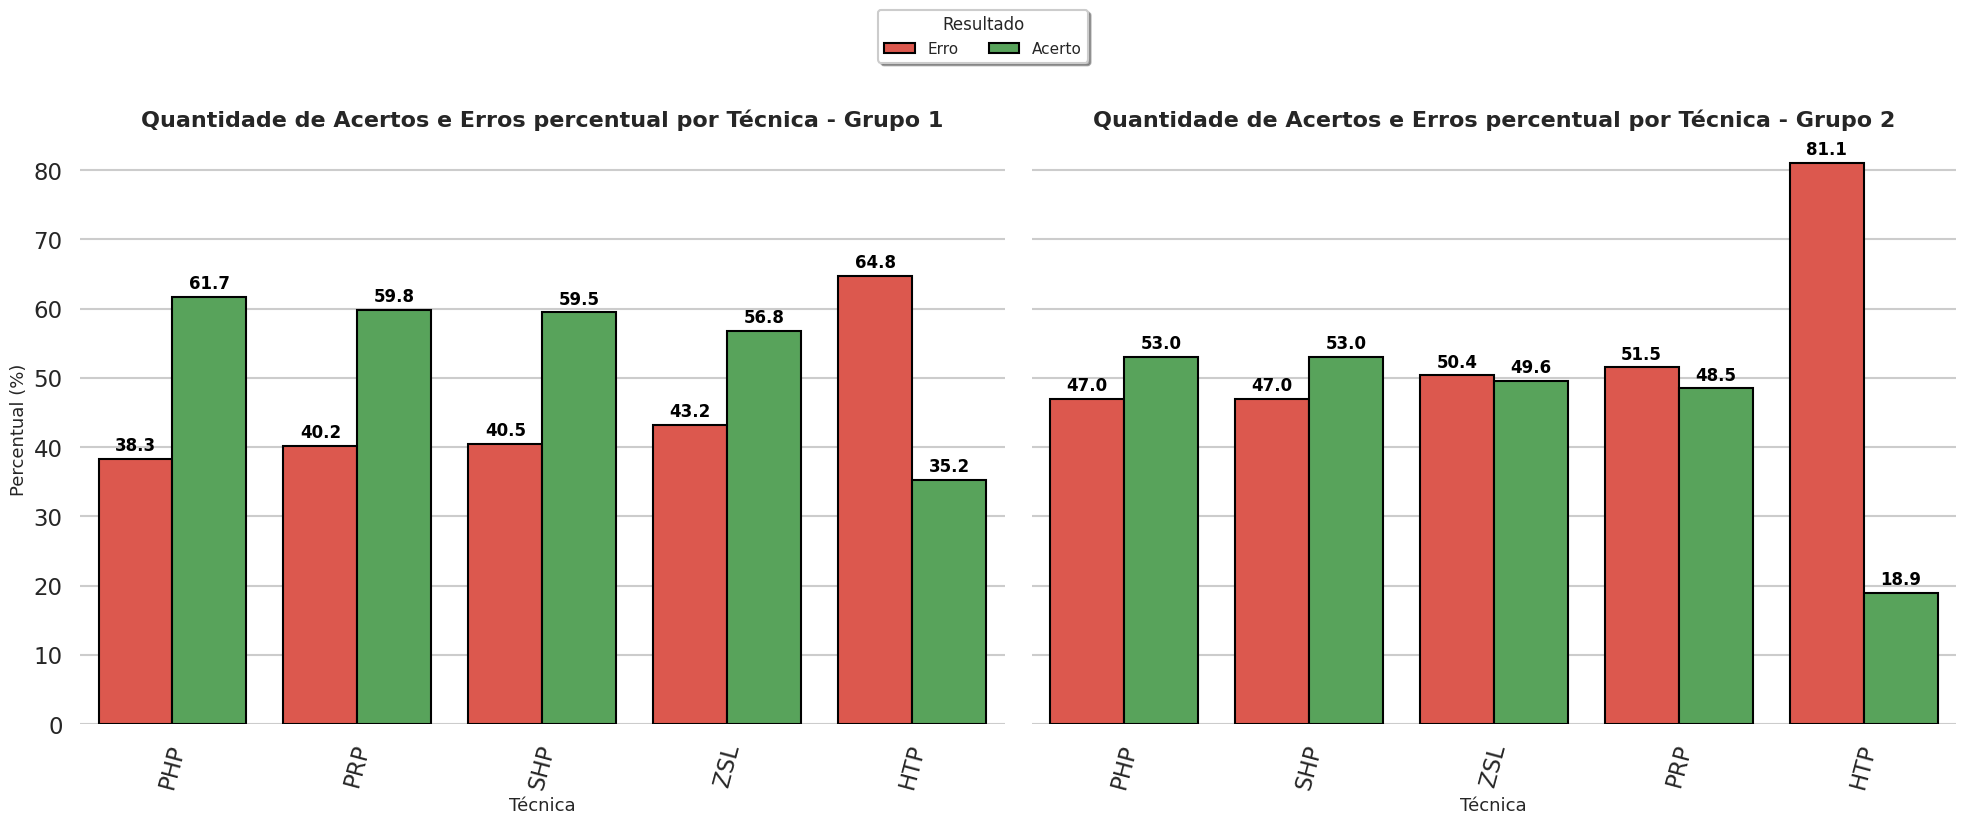

In [69]:
df_count_model_group1 = (
    df_final[df_final['grupo_model'] == 'grupo 1']
    .groupby(['tecnica','acertou'], as_index=False)
    .agg(quantidade=('id', 'count'))
    .assign(
        resultado=lambda x: x['acertou'].map({1: 'Acerto', 0: 'Erro'}),
        percentual=lambda x: 100 * x['quantidade'] / x.groupby('tecnica')['quantidade'].transform('sum')
    )
)

df_count_model_group2 = (
    df_final[df_final['grupo_model'] == 'grupo 2']
    .groupby(['tecnica','acertou'], as_index=False)
    .agg(quantidade=('id', 'count'))
    .assign(
        resultado=lambda x: x['acertou'].map({1: 'Acerto', 0: 'Erro'}),
        percentual=lambda x: 100 * x['quantidade'] / x.groupby('tecnica')['quantidade'].transform('sum')
    )
)

ordem_tecnicas1 = (
    df_count_model_group1[df_count_model_group1['resultado'] == 'Acerto']
    .sort_values('percentual', ascending=False)['tecnica']
    .values
)

ordem_tecnicas2 = (
    df_count_model_group2[df_count_model_group2['resultado'] == 'Acerto']
    .sort_values('percentual', ascending=False)['tecnica']
    .values
)

sns.set_theme(style="whitegrid", context="talk")

palette = {
    'Acerto': '#4CAF50',
    'Erro': '#F44336'
}

fig, axes = plt.subplots(1, 2, figsize=(20, 8), sharey=True)

# --- Gráfico Grupo 1 ---
sns.barplot(
    data=df_count_model_group1,
    x='tecnica',
    y='percentual',
    hue='resultado',
    ci=None,
    order=ordem_tecnicas1,
    palette=palette,
    edgecolor='black',
    ax=axes[0]
)
axes[0].set_title('Quantidade de Acertos e Erros percentual por Técnica - Grupo 1', fontsize=16, weight='bold')
axes[0].set_xlabel('Técnica', fontsize=13)
axes[0].set_ylabel('Percentual (%)', fontsize=13)
axes[0].tick_params(axis='x', rotation=75)

# --- Gráfico Grupo 2 ---
sns.barplot(
    data=df_count_model_group2,
    x='tecnica',
    y='percentual',
    hue='resultado',
    ci=None,
    order=ordem_tecnicas2,
    palette=palette,
    edgecolor='black',
    ax=axes[1]
)
axes[1].set_title('Quantidade de Acertos e Erros percentual por Técnica - Grupo 2', fontsize=16, weight='bold')
axes[1].set_xlabel('Técnica', fontsize=13)
axes[1].set_ylabel('Percentual (%)', fontsize=13)
axes[1].tick_params(axis='x', rotation=75)

# --- Legenda geral ---
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(
    handles,
    labels,
    title='Resultado',
    title_fontsize=12,
    fontsize=11,
    loc='upper center',
    ncol=2,
    frameon=True,
    shadow=True,
    bbox_to_anchor=(0.5, 1.05)
)

# Remove legendas duplicadas dos subplots
for ax in axes:
    if ax.get_legend() is not None:
        ax.get_legend().remove()

# --- Adicionar valores sobre as barras ---
for ax in axes:
    for container in ax.containers:
        ax.bar_label(
            container,
            fmt='%.1f',           # mostra uma casa decimal
            label_type='edge',    # coloca no topo da barra
            fontsize=12,
            padding=3,
            #ha="center",
            fontweight="bold",
            color="black"
        )

sns.despine(left=True, bottom=True)
plt.tight_layout(rect=[0, 0, 1, 0.95])

fig.savefig("figuras_analise/percentual_tecnica_grupos.png", dpi=400, bbox_inches='tight')

plt.show()
plt.close(fig)


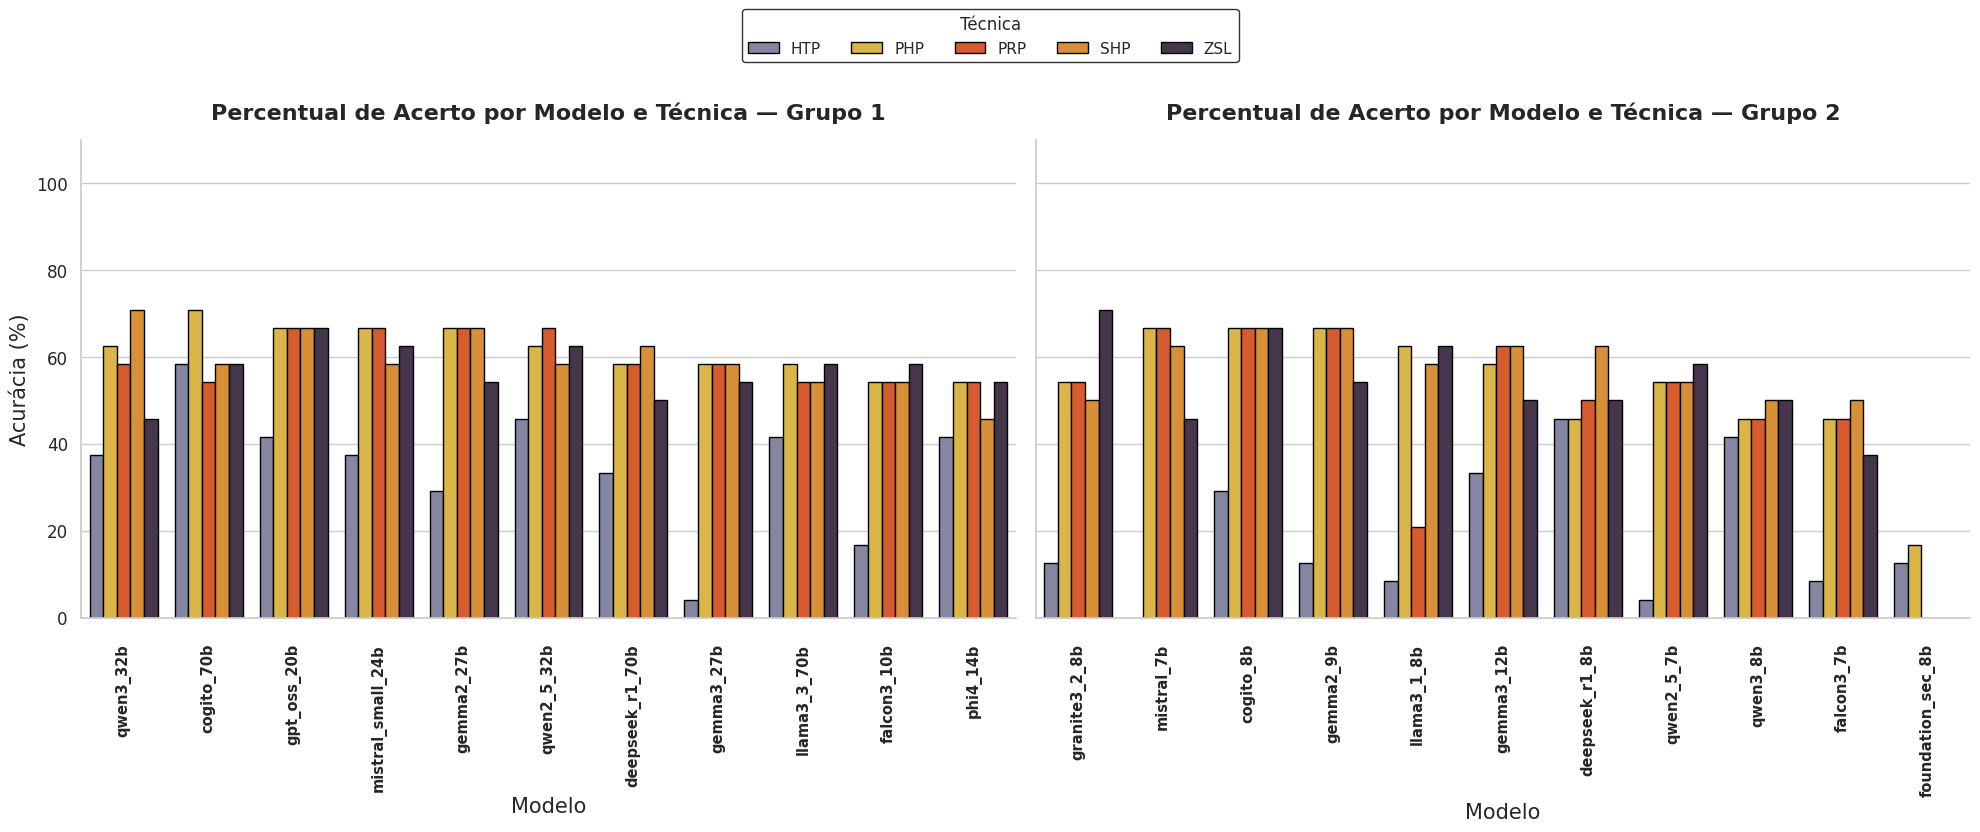

In [70]:
df_counts_model_tecnica = (
    df_final
    .groupby(['grupo_model', 'modelo', 'tecnica', 'acertou'], as_index=False)
    .agg(quantidade=('id', 'count'))
)
df_counts_model_tecnica['resultado'] = df_counts_model_tecnica['acertou'].map({1: 'Acerto', 0: 'Erro'})

df_counts_model_tecnica['percentual'] = (
    df_counts_model_tecnica
    .groupby(['grupo_model', 'modelo', 'tecnica'])['quantidade']
    .transform(lambda x: 100 * x / x.sum())
)

# 2️⃣ Filtrar apenas acertos
df_acertos = df_counts_model_tecnica[df_counts_model_tecnica['resultado'] == 'Acerto']

# 3️⃣ Paleta de cores fixa por técnica
tecnicas_cores = {
    "PHP": "#F2C230",
    "SHP": "#F2921D",
    "PRP": "#F24F13",
    "HTP": "#8082A6",
    "ZSL": "#46334F"
}

# 4️⃣ Criar a figura com dois subplots lado a lado
sns.set_theme(style="whitegrid", font_scale=1.1)
fig, axes = plt.subplots(1, 2, figsize=(20, 8), sharey=True)

# 5️⃣ Loop pelos grupos
for ax, grupo in zip(axes, ['grupo 1', 'grupo 2']):
    df_grupo = df_acertos[df_acertos['grupo_model'] == grupo]
    ordem_modelos = (
        df_grupo
        .sort_values('percentual', ascending=False)['modelo']
        .unique()
    )

    sns.barplot(
        data=df_grupo,
        x="modelo",
        y="percentual",
        hue="tecnica",
        palette=tecnicas_cores,
        edgecolor="black",
        order=ordem_modelos,
        ax=ax
    )

    # Nomes dos modelos em negrito
    for label in ax.get_xticklabels():
        label.set_fontweight("bold")

    # Títulos e rótulos
    ax.set_title(f"Percentual de Acerto por Modelo e Técnica — {grupo.capitalize()}", fontsize=16, weight="bold", pad=15)
    ax.set_xlabel("Modelo", fontsize=15)
    ax.set_ylabel("Acurácia (%)", fontsize=15)
    ax.tick_params(axis='x', rotation=90, labelsize=10.5, color="black", size=15)
    ax.set_ylim(0, 110)

# 6️⃣ Legenda única no topo
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(
    handles,
    labels,
    title="Técnica",
    title_fontsize=12,
    fontsize=11,
    loc="upper center",
    ncol=5,
    frameon=True,
    edgecolor="black",
    bbox_to_anchor=(0.5, 1.05)
)

for ax in axes:
    ax.get_legend().remove()

sns.despine()
plt.tight_layout(rect=[0, 0, 1, 0.95])

#Salvar em alta resolução
fig.savefig("figuras_analise/modelo_tecnica_percentual.png", dpi=400, bbox_inches='tight')

plt.show()
plt.close(fig)

In [71]:
df_counts_model_tecnica[(df_counts_model_tecnica['grupo_model']=='grupo 2') & (df_counts_model_tecnica['resultado']=='Acerto')].sort_values('percentual',ascending=False).head(5)

,grupo_model,modelo,tecnica,acertou,quantidade,resultado,percentual
176,grupo 2,granite3_2_8b,ZSL,1,17,Acerto,70.833333
189,grupo 2,mistral_7b,PHP,1,16,Acerto,66.666667
115,grupo 2,cogito_8b,PRP,1,16,Acerto,66.666667
117,grupo 2,cogito_8b,SHP,1,16,Acerto,66.666667
119,grupo 2,cogito_8b,ZSL,1,16,Acerto,66.666667


In [72]:
df_counts_model_tecnica[(df_counts_model_tecnica['grupo_model']=='grupo 1') & (df_counts_model_tecnica['resultado']=='Acerto')].sort_values('percentual',ascending=False).head(5)

,grupo_model,modelo,tecnica,acertou,quantidade,resultado,percentual
107,grupo 1,qwen3_32b,SHP,1,17,Acerto,70.833333
3,grupo 1,cogito_70b,PHP,1,17,Acerto,70.833333
55,grupo 1,gpt_oss_20b,PRP,1,16,Acerto,66.666667
75,grupo 1,mistral_small_24b,PRP,1,16,Acerto,66.666667
57,grupo 1,gpt_oss_20b,SHP,1,16,Acerto,66.666667


# Análise de categoria:

| Código | Categoria | Descrição | Exemplos Típicos |
|--------|----------|-----------|-----------------|
| CAT1-Comprometimento de Conta | CAT1 | Comprometimento de Conta | Acesso não autorizado a contas de usuários ou administradores. Phishing de credenciais, brute force SSH bem-sucedido, roubo de token OAuth, comprometimento de SSO. |
| CAT2-Malware | CAT2 | Malware | Infecção por código malicioso que compromete dispositivos ou dados. Ransomware, vírus de macro, cavalo de Troia, spyware, worms de propagação automática. |
| CAT3-Ataque de Negação de Serviço (DoS/DDoS) | CAT3 | Ataque de Negação de Serviço (DoS/DDoS) | Tornar sistemas ou redes indisponíveis. DDoS HTTP/S, volumétrico (UDP flood, SYN flood), ataque a APIs públicas, botnet Mirai atacando servidor web. |
| CAT4-Exfiltração ou Vazamento de Dados | CAT4 | Exfiltração ou Vazamento de Dados | Acesso, cópia ou divulgação não autorizada de dados sensíveis. Roubo de banco de dados, vazamento de credenciais, exposição de backups públicos, ransomware com exfiltração. |
| CAT5-Exploração de Vulnerabilidade | CAT5 | Exploração de Vulnerabilidade | Uso de falhas conhecidas ou desconhecidas para comprometer ativos. Exploração de CVE crítica em firewall, execução remota de código (RCE), SQL injection em aplicações web. |
| CAT6-Abuso Interno | CAT6 | Abuso Interno | Ações intencionais ou negligentes de usuários internos. Cópia de dados sigilosos, sabotagem de sistemas, abuso de privilégios em dados sensíveis. |
| CAT7-Engenharia Social | CAT7 | Engenharia Social | Engano de pessoas para obter acesso ou informações. Phishing, vishing, pretexting, fraude do CEO (fake CEO scam). |
| CAT8-Incidente Físico ou de Infraestrutura | CAT8 | Incidente Físico ou de Infraestrutura | Violação física que impacta ativos computacionais. Roubo de notebook, arrombamento de datacenter, destruição física de switches ou roteadores. |
| CAT9-Alteração Não Autorizada | CAT9 | Alteração Não Autorizada | Modificação não autorizada em sistemas, dados ou configurações. Defacement de websites, alteração maliciosa de firewall, manipulação de registros financeiros. |
| CAT10-Uso Indevido de Recursos | CAT10 | Uso Indevido de Recursos | Uso não autorizado de sistemas para outros fins. Mineração de criptomoeda, distribuição de malware pela rede da empresa, uso pessoal de servidores corporativos. |
| CAT11-Problema de Fornecedor/Terceiro | CAT11 | Problema de Fornecedor/Terceiro | Incidente originado por falha de segurança de terceiros. Breach em provedor cloud (S3 buckets), ataque de supply chain (SolarWinds), vazamento em SaaS. |
| CAT12-Tentativa de Intrusão | CAT12 | Tentativa de Intrusão | Tentativas hostis de invasão ainda não confirmadas como bem-sucedidas. Scans de rede (Nmap, Masscan), brute force SSH, tentativas de login inválido, exploits bloqueados. |


In [73]:
df_final['tecnica'].unique()

array(['HTP', 'PHP', 'PRP', 'SHP', 'ZSL'], dtype=object)

In [74]:
df_final['categoria'].unique()

array(['CAT12', 'CAT2', 'CAT3', 'CAT5', 'CAT7', 'CAT9'], dtype=object)

/tmp/ipykernel_640825/928838746.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipykernel_640825/928838746.py:19: UserWarning: 
The palette list has fewer values (10) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(


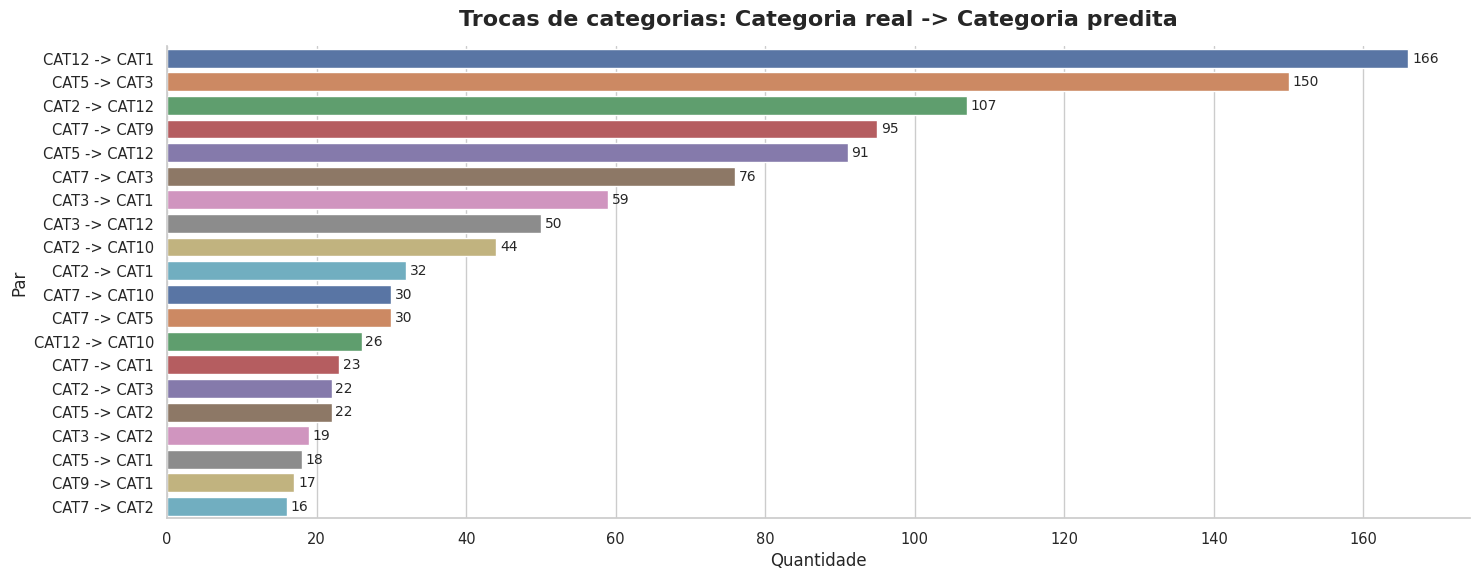

In [78]:
df_f = df_final[df_final["categoria_predita"].str.match(r"CAT\d+", na=False)]
df_f = df_f[df_f['categoria_predita']!=df_f['categoria']][['categoria','categoria_predita']]
df_f["pares"] = df_f['categoria'] + " -> " + df_f['categoria_predita']

df_pares = (
    df_f.groupby("pares")
    .size()
    .reset_index(name="quantidade")
)

# Filtrar apenas pares com mais de 15 ocorrências
df_pares_maiores15 = df_pares[df_pares["quantidade"] > 15]

# Ordenar do maior para o menor
df_pares_maiores15 = df_pares_maiores15.sort_values(by="quantidade", ascending=False)

# Plotar gráfico de barras horizontal
fig = plt.figure(figsize=(15, 6))
sns.barplot(
    data=df_pares_maiores15,
    y="pares",
    x="quantidade",
    palette=sns.color_palette()
)

# Personalização do gráfico
plt.title("Trocas de categorias: Categoria real -> Categoria predita", fontsize=16, fontweight="bold", pad=15)
plt.xlabel("Quantidade", fontsize=12)
plt.ylabel("Par", fontsize=12)
plt.xticks(fontsize=10.5)
plt.yticks(fontsize=10.5)
sns.despine()

# Mostrar os valores ao lado das barras
for i, v in enumerate(df_pares_maiores15["quantidade"]):
    plt.text(v + 0.5, i, str(v), va="center", fontsize=10)

plt.tight_layout()
fig.savefig("figuras_analise/trocas_categorias.png", dpi=400, bbox_inches='tight')

plt.show()
plt.close()


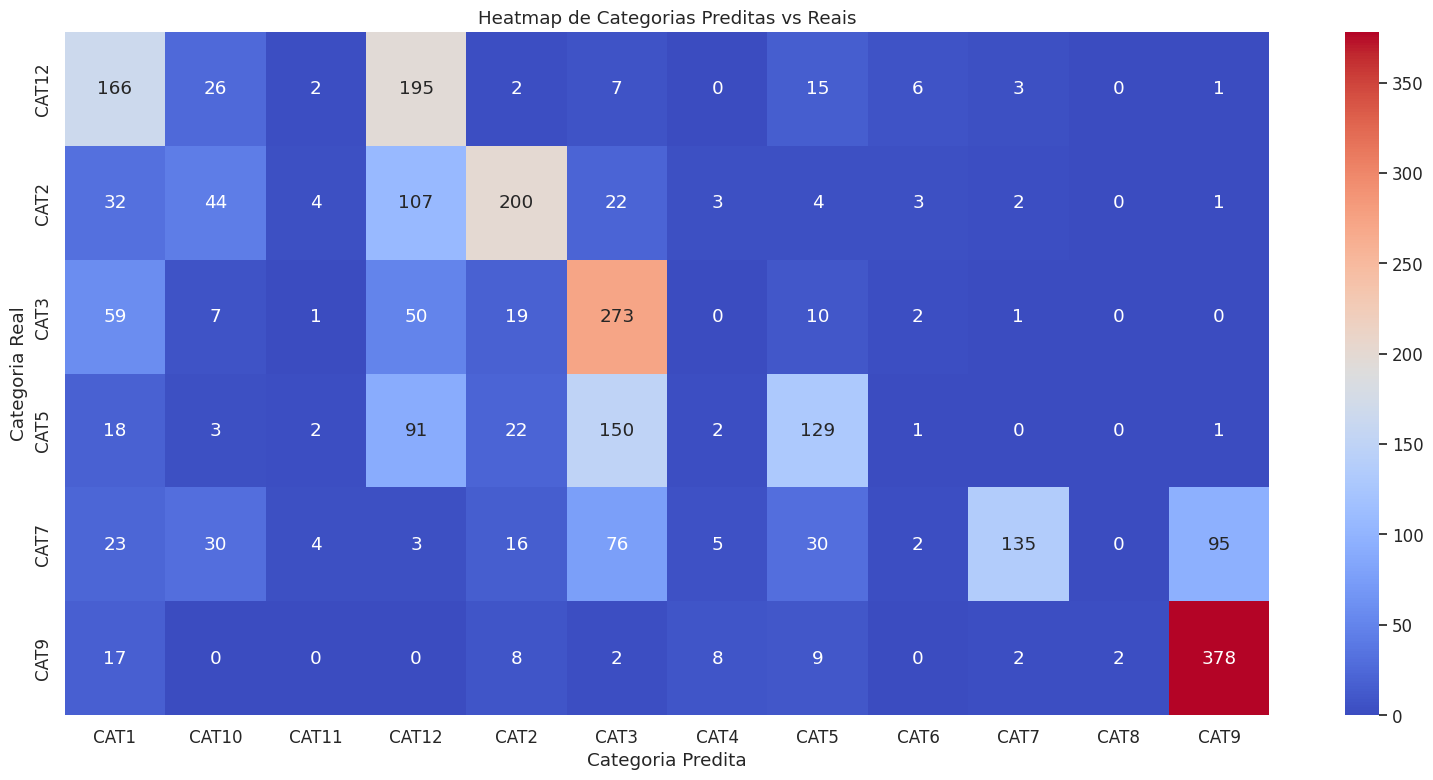

In [79]:
df_filtered = df_final[df_final["categoria_predita"].str.match(r"CAT\d+", na=False)]

# Matriz de confusão com valores absolutos
conf_matrix = pd.crosstab(
    df_filtered["categoria"],
    df_filtered["categoria_predita"]
)

fig = plt.figure(figsize=(16, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="coolwarm")
plt.title("Heatmap de Categorias Preditas vs Reais")
plt.xlabel("Categoria Predita")
plt.ylabel("Categoria Real")
plt.tight_layout()
fig.savefig("figuras_analise/heat_map_trocas.png", dpi=400, bbox_inches='tight')

plt.show()

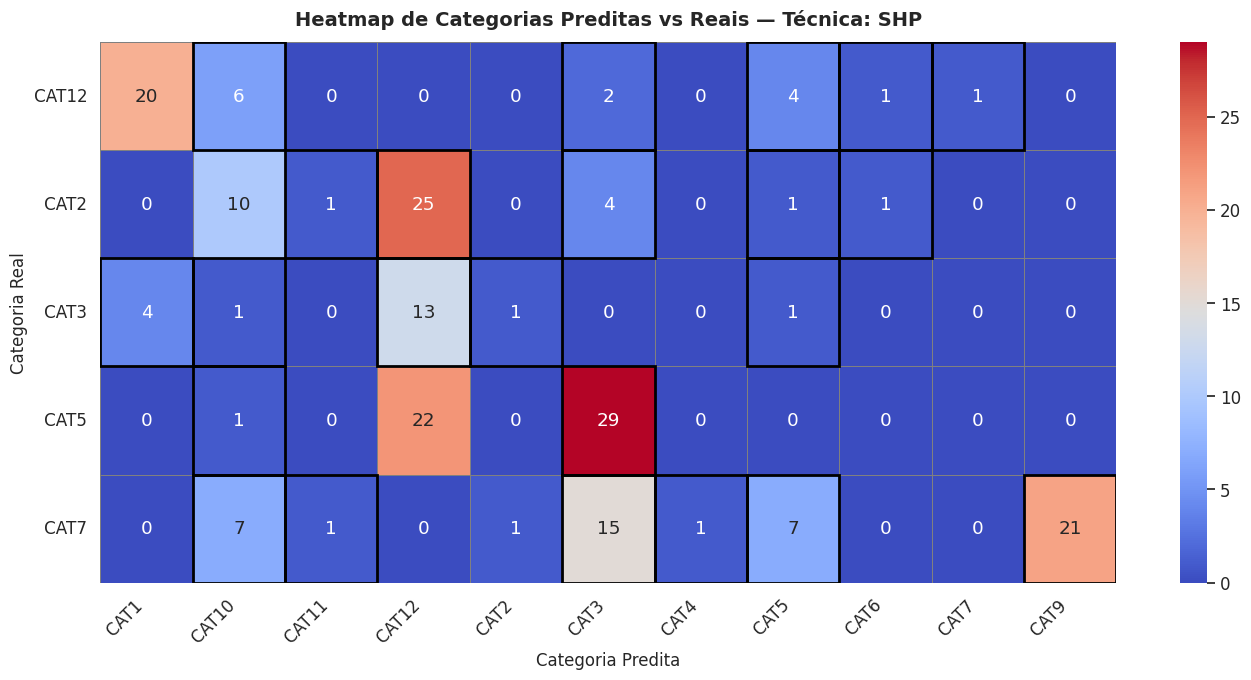

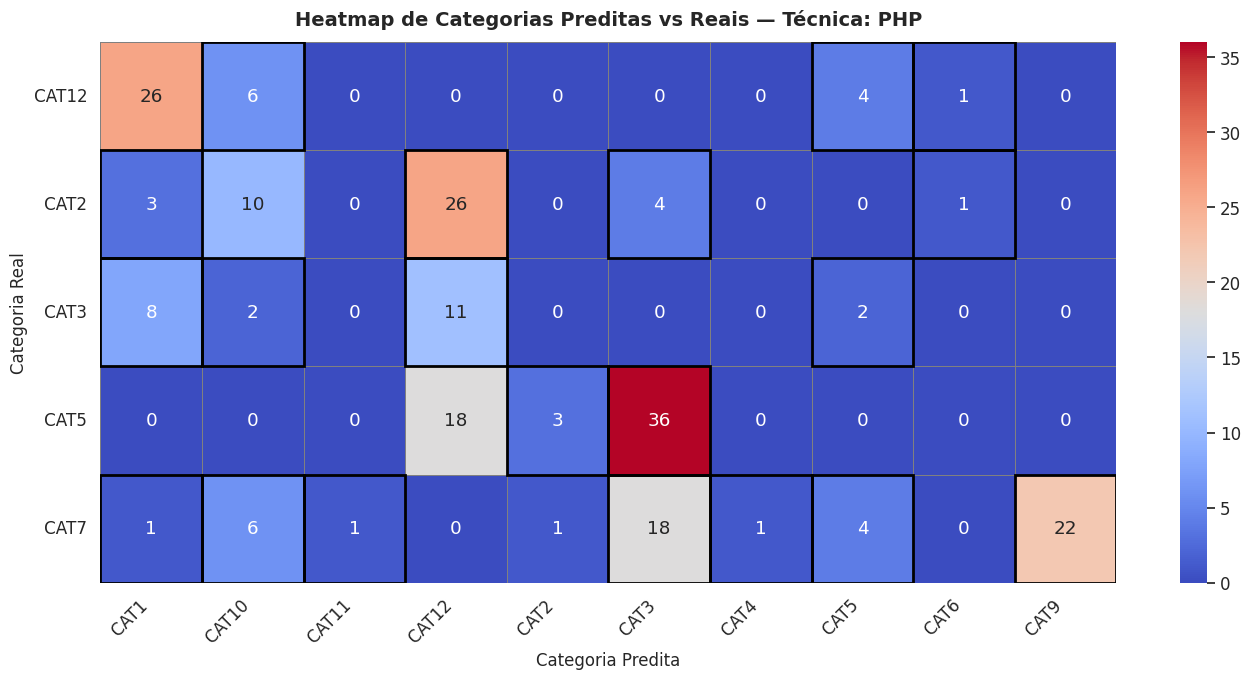

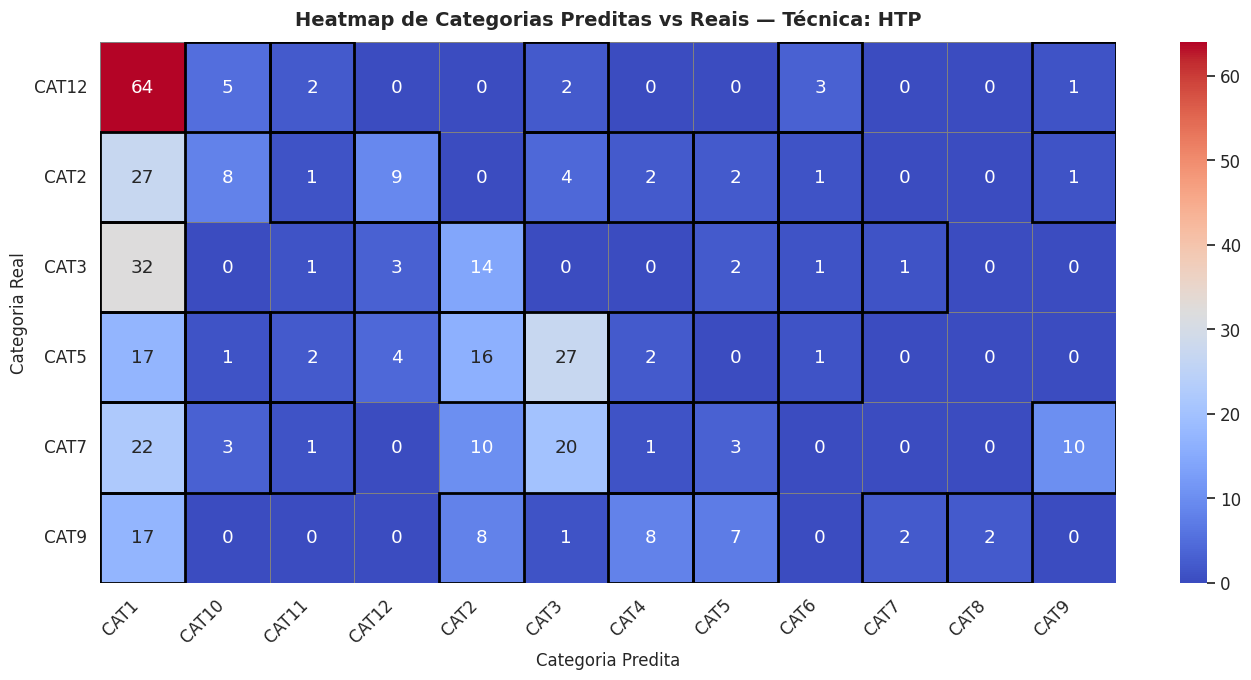

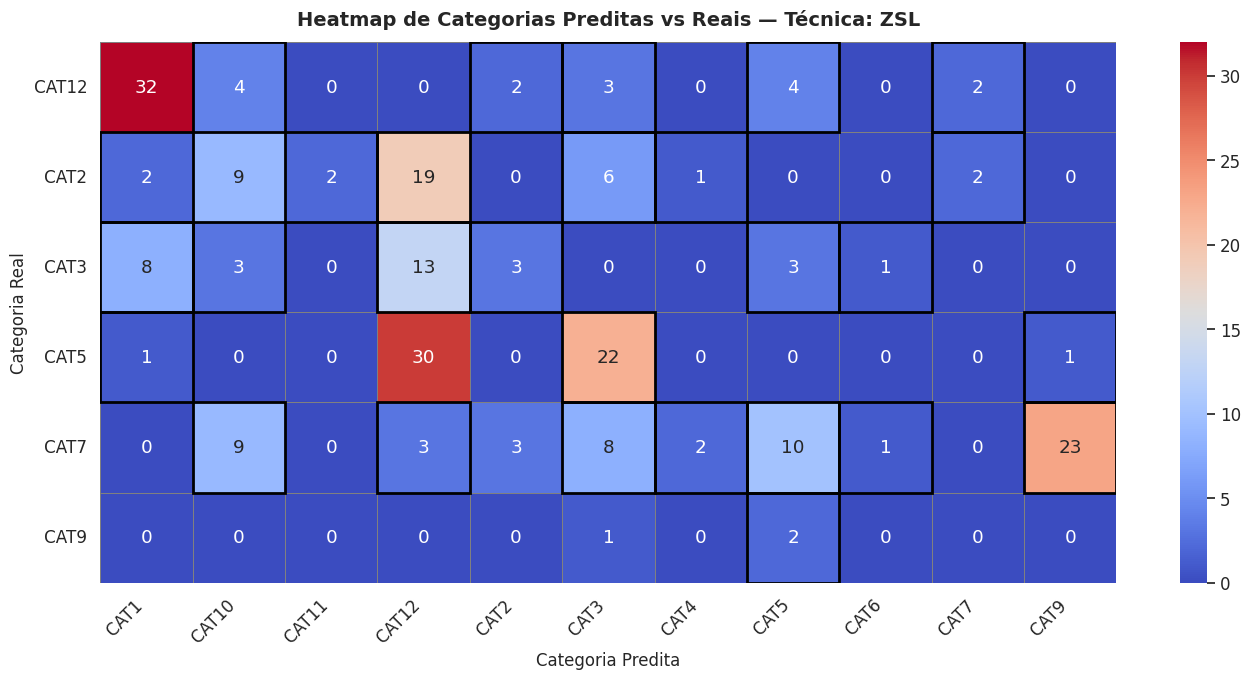

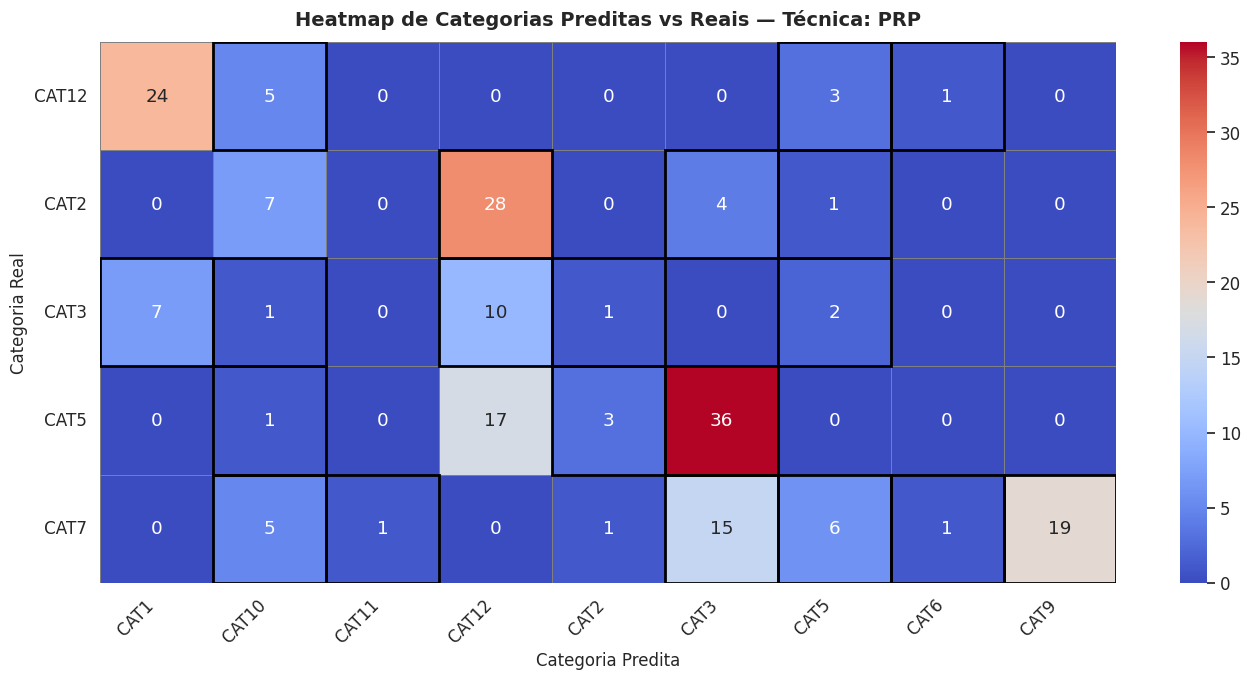

In [80]:
tecnicas = ['SHP', 'PHP', 'HTP', 'ZSL','PRP']
dfaux = df_final[df_final['acertou'] != 1]

# Loop para gerar um heatmap por técnica
for tecnica in tecnicas:
    df_filtered = dfaux[
        (dfaux["tecnica"] == tecnica) &
        (dfaux["categoria_predita"].str.match(r"CAT\d+", na=False))
    ]
    
    # Se não houver dados, pula
    if df_filtered.empty:
        print(f"⚠ Sem dados para a técnica: {tecnica}. Heatmap ignorado.")
        continue
    
    # Matriz de confusão
    conf_matrix = pd.crosstab(
        df_filtered["categoria"],
        df_filtered["categoria_predita"]
    )

    # Se matriz vazia (0x0), pula
    if conf_matrix.empty:
        print(f"⚠ Matriz vazia para técnica: {tecnica}. Nada para plotar.")
        continue

    # Figura e estilo
    fig =plt.figure(figsize=(14, 7))
    ax = sns.heatmap(
        conf_matrix,
        annot=True,
        fmt="d",
        cmap="coolwarm",
        linewidths=0.5,
        linecolor="gray",
        cbar=True
    )

    # Enfatizar as trocas (fora da diagonal)
    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            if i != j and conf_matrix.values[i, j] > 0:
                ax.add_patch(
                    plt.Rectangle((j, i), 1, 1,
                                  fill=False, edgecolor='black', lw=2)
                )

    plt.title(
        f"Heatmap de Categorias Preditas vs Reais — Técnica: {tecnica}",
        fontsize=14,
        fontweight='bold',
        pad=12
    )
    plt.xlabel("Categoria Predita", fontsize=12)
    plt.ylabel("Categoria Real", fontsize=12)
    plt.xticks(rotation=45, ha="right")
    plt.yticks(rotation=0)

    plt.tight_layout()
    fig.savefig(f"figuras_analise/heat_map_trocas_tecnica_{tecnica}.png", dpi=400, bbox_inches='tight')
    plt.show()


## Análise de Troca de Categorias NIST: Desafios dos Modelos de Prompting

O problema de os modelos (LLMs) trocarem as categorias NIST durante a classificação é comum em tarefas de processamento de linguagem natural (NLP) em cibersegurança e é frequentemente atribuído à **ambiguidade e sobreposição** inerentes às próprias categorias de incidentes, bem como à **complexidade e incompletude** dos dados de incidentes.

Analisando os _heatmaps_ e os códigos dos plugins fornecidos, podemos identificar os principais pontos de confusão (trocas) para as técnicas de *Zero-Shot*, *Progressive Hint*, *Self Hint* e *Progressive Rectification*:

### 1. Ambiguidade e Sobreposição das Categorias NIST

As maiores trocas (valores altos fora da diagonal principal nos _heatmaps_) ocorrem entre categorias cujas definições e exemplos se sobrepõem no contexto de um ataque.

| Categoria Real | Categoria Predita | Frequência (Exemplos Máximos) | Motivo Potencial da Troca |
| :---: | :---: | :---: | :--- |
| **CAT2 (Malware)** | **CAT12 (Intrusion Attempt)** | ZeroShot: **19** | **Malware como Tentativa:** Uma detecção de malware (CAT2) pode ser classificada como uma tentativa de intrusão (CAT12) se a infecção for **bloqueada** ou se a descrição focar no **ato de infecção** em vez da infecção em si. |
| **CAT5 (Vulnerability Exploitation)** | **CAT12 (Intrusion Attempt)** | ZeroShot: **30** | **Exploit como Tentativa:** A exploração de uma vulnerabilidade (CAT5) é frequentemente uma **tentativa** de ataque. Se o incidente for **bloqueado** ou se a descrição focar no **alerta de exploração** (como um *scan* ou *probe*, termos do CAT12), a classificação pode ser trocada. |
| **CAT2 (Malware)** | **CAT3 (DoS)** | Progressive Hint: **26** | **Impacto ou Ferramenta:** Ataques DoS/DDoS (CAT3) podem ser realizados por *malware* (botnets, Mirai). O modelo pode se confundir entre a **ferramenta** (Malware/CAT2) e o **impacto/resultado** (DoS/CAT3). |
| **CAT5 (Vulnerability Exploitation)** | **CAT3 (DoS)** | Progressive Hint: **36** | **Exploit com Efeito DoS:** A exploração de vulnerabilidade (CAT5) pode causar a **indisponibilidade** de um sistema (Denial of Service/CAT3). O modelo pode classificar com base no sintoma mais aparente (*outage/site down*) em vez da causa raiz (*exploit*). |
| **CAT7 (Social Engineering)** | **CAT1 (Account Compromise)** | Progressive Hint: **26** (com CAT2) | **Fase do Ataque:** A engenharia social (CAT7, ex: *phishing*) é frequentemente um **vetor inicial** para o comprometimento de conta (CAT1, ex: *credential theft*). Se o *prompt* descrever a *ação de phishing* (CAT7) que **resultou** em um *comprometimento* (CAT1), o modelo pode focar no resultado final. |
| **CAT12 (Intrusion Attempt)** | **CAT1 (Account Compromise)** | Progressive Rectification: **23** | **Tentativa vs. Sucesso de Acesso:** Uma *tentativa de brute force* (CAT12) é muito similar a um *comprometimento de conta* (CAT1). A classificação depende da palavra-chave que indica **sucesso** (CAT1) ou **bloqueio/tentativa** (CAT12). |

### 2. Desafios das Técnicas de Prompting

As trocas persistem mesmo com o uso de técnicas avançadas como *Hinting* e *Rectification*, indicando que o desafio não é apenas a compreensão inicial do modelo, mas a interpretação do contexto de segurança:

* **Progressive Hint (`progressive_hint.py`):** Ao gerar uma dica baseada na **categoria anterior**, o modelo pode reforçar uma classificação incorreta se a primeira resposta já estiver errada ou ambígua. A dica "The category is near: [CAT errada]" pode desviar ainda mais a classificação.
* **Self Hint (`self_hint.py`):** O modelo gera seu próprio plano e se refina, mas se o **plano inicial (`plano_intermediario`)** estiver focado no aspeto errado (por exemplo, no impacto DoS em vez da exploração RCE), o refinamento subsequente (`prompt_reflexao`) perpetuará o erro.
* **Progressive Rectification (`progressive_rectification.py`):** Esta técnica tenta **mascarar** palavras-chave (`_mask_prompt`) para forçar o modelo a revalidar. No entanto, o mascaramento de uma subcategoria, como "malware" ou "exploit", pode remover a pista crucial, levando o modelo a "retificar" para uma categoria mais genérica, como CAT3 ou CAT12.

### Resumo das Causas

| Categoria da Causa | Descrição |
| :--- | :--- |
| **Ambiguidade Semântica** | Muitas categorias NIST descrevem fases ou aspectos de um único evento (ex: *Phishing* (CAT7) leva a *Account Compromise* (CAT1)). Os LLMs têm dificuldade em identificar a **principal** categoria de interesse. |
| **Foco em Indicadores** | Incidentes reais são frequentemente descritos com **indicadores** ambíguos, contraditórios e incompletos. O modelo pode classificar com base em um sintoma (ex: *site down* $\rightarrow$ CAT3) em vez da causa raiz (ex: *exploit* $\rightarrow$ CAT5). |
| **Definição de Sucesso/Tentativa** | A fronteira entre **Intrusion Attempt (CAT12)** e categorias de ataque bem-sucedidas (CAT1, CAT2, CAT5) é tênue. A diferença reside em se o ataque foi **bloqueado** ou **bem-sucedido**, o que pode não estar claro no texto do incidente. |
| **Viés da Dica/Plano** | Em técnicas iterativas (*Hint*, *Self Hint*), um erro na primeira iteração pode ser **reforçado** nas iterações seguintes, pois o modelo se baseia na sua própria resposta errada anterior para o refinamento. |

O principal desafio reside em treinar ou guiar o LLM para distinguir entre o **vetor de ataque**, a **ferramenta**, a **causa raiz** e o **impacto final**, e priorizar a categoria mais relevante no contexto do tratamento de incidentes.